# COGS 108 - Final Project 

# Overview 

In this project, the possibility of a negative relationship between the number of critical violations and the score given to restaurants in the 27511 postal code of Wake County, North Carolina is analyzed. Additionally, it is investigated if  such relationship correlates with the violation made. To conduct this research, the data gathered focuses on restaurant inspections only, within the Chemical category of the North Carolina risk factor. Through data cleaning and data analysis, it is identified that there is a negative relationship between the number of critical violations and the given score for restaurants in the 27511 postal code of Wake County, North Carolina. In addition, it is found that this relationship does not correlate with the violation type made.

# Name & GitHub

- ### Name: Daniela Hernandez 
- ### GitHub Username: dah103

# Research Question

Is there a negative relationship between the number of critical violations and the given score for restaurants in the 27511 postal code of Wake County, North Carolina, and does this relationship correlate with the type of violation made?  

## Background and Prior Work

When conducting food inspections, the Wake County health department assesses any violations that are present in active food service facilities. These violations are listed accordingly with violations codes and through the CDC Risk Factors guidelines [1]. Conducting these inspections allows for the prevention of any health hazards, and for both the location and elimination of a hazardous source "in the event of disease outbreak" [1]. Furthermore, the spread of foodborne illness can be decreased by identifying these violations. As expressed in a 2016 article from *Triangle Business Journal*, the spread of foodborne illness is increased when a critical violation is present [2]. Hence, it is unsurprising that inspections "focus more on the critical violation risk factors" [3].  

With this in mind, the research question here aims to identify whether there is a negative relationship between a restaurant's number of critical violations and its given score. Having a negative relationship between these two variables indicates that if there are a lot of critical violations, the score given to a restaurant should be lower. In other words, if one variable is higher, the other should be lower, Identifying if such relationship exists can help decrease a restaurant's number of critical violations, since the score can provide restaurants with a motivation to improve their sanitation conditions. In return, the health inspection process can be a much faster procedure since there would be less critical violations to analyze. Similarly, if there is a correlation between the violation type and the negative relationship previously described, then the inspection process can also be made more efficient because of the fewer violations, and for increased chances of correcting anything during the inspection instead of requiring further verifaction or be considered a repeated violation.

To better investigate this question, two GitHub source about food inspections in Wake County were assessed. The first source was a predictive project that ranks the health-violation risk for restaurants in Wake County [4]. This source focuses on just restaurants in Wake County, something that will be similarly applied with this research question. In contrast, Yelp ratings and comments will not be considered, since it does not necessarily apply to the question being asked, something that this first source does require. As for the second source, it is not clear exactly what they were analyzing by considering Wake County Restaurant inspections, but the observations kept within their datasets, such as the inspection type and the score, prove useful for any data cleaning that this research question will require [5]. In all, using both sources will provide an additional help to carry out the research question being asked.  
 
References:

[1] https://data.wakegov.com/datasets/food-inspection-violations

[2] https://www.bizjournals.com/triangle/news/2016/01/29/wake-county-restaurants-health-code-violations.html

[3] http://www.wakegov.com/food/healthinspections/tidbits/documents/explanationofnewinspectionform.pdf

[4] https://github.com/guyawn/FoodInspections

[5] https://github.com/licia858/ETLProject

# Hypothesis


There is a negative relationship between the number of critical violations and the given score for restaurants in the 27511 postal code of Wake County, North Carolina, but this relationship does not correlate with the violation type made. 

The reasoning behind this hypothesis is that a lower score should be given if the number of critical violations is higher relative to others, especially to maintain accountability in regards to food safety and the prevention of any health issues. That said, the type of violation made should not necessarily correlate with the relationship stated previously, since the violation can be corrected during the inspection (CDI), repeated (R) from the previous inspection, or require verification (VR). This seems to make the violation type to be due to chance, and hence should not necessarily correlate with the relationship between the number of critical violations and the given score for restaurants in the 27511 postal code of Wake County, North Carolina. 

# Dataset(s)

Dataset Name: inspections.csv
Link to the dataset: Provided 
Number of observations: 8 observations kept out of 36 observations total (columns)
The observations kept consist of: HSISID, Zip, Facility, Type, InspectionNum, CriticalNum, NonCriticalNum, and Score. This is to adequately analyze if the critical number negatively relates to the score given to a restaurant in an inspection. 

Dataset Name: violations.csv
Link to the dataset: Provided
Number of observations: 4 observations kept out of 18 observations total (columns)
The observations kept consist of: HSISID, Category, Severity, and ViolationType. This is to combine this dataset with the first dataset based on the HSISID, and adequately analyze if the critical number negatively relates to the score given to a restaurant in an inspection. 

Both of these datasets will be combined by merging them via their HSISID, since both data sets include this information. 

# Setup

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Data Cleaning Steps: 

After opening the inspections.csv file, the describe function was used to identify what observations the dataset came with, in particular the columns for each facility. After fully coming up with a research question, the columns not directly related to the research question were dropped. The columns that were kept were then reformatted to be in an order that was easier to read from left to right (eg. having the HSISID at the left, and the score at the right. The columns kept were also renamed so as to provide a more informative name. The rows that were dropped were the ones that were not restaurants, and the ones that had scores less than or equal to 95.0, since a score above that was a more reasonable score to accept in reading the information provided from the first source. The same process was done with the violations.csv file, keeping only the relevant columns and the rows that were in the chemical category.  

Once both files had been cleaned, they were merged by the HSISID for better comparison purposes. The columns were again reorganized from left to right for easier understanding and reading, again, leaving HSISID at the left and the score at the right. Additionally, the rows that were not in the 27511 postal code were dropped, so as to focus on one postal zip code. 

In [2]:
# read csv file
df_ins = pd.read_csv('inspections.csv')
# drop columns not directly related to the research question 
df_ins = df_ins.drop(['date', 'name', 'address1', 'address2', 'city', 'postalcode', 'phonenumber', 'restaurantopendate', 'days_from_open_date', 'x', 'y', 'geocodestatus', 'inspectedby', 'previous_inspection_date', 'days_since_previous_inspection', 'description','previous_inspection_by_same_inspector', 'state', 'inspector_id', 'avg_neighbor_num_critical','avg_neighbor_num_non_critical', 'top_match', 'second_match', 'num_critical_previous', 'num_non_critical_previous', 'num_critical_mean_previous', 'num_non_critical_mean_previous'], axis=1)
# focus on restaurants only
df_ins = df_ins[df_ins.facilitytype == 'Restaurant']
# reorganize columns for better left to right reading
df_ins = df_ins[['hsisid', 'zip', 'facilitytype', 'type', 'inspection_num', 'num_critical', 'num_non_critical', 'score']]
# rename columns for better understanding
df_ins = df_ins.rename(columns = {'hsisid': 'HSISID', 'zip': 'Zip', 'facilitytype': 'Facility', 'type': 'Type', 'inspection_num': 'InspectionNum', 'num_critical': 'CriticalNum', 'num_non_critical': 'NonCriticalNum', 'score': 'Score'})
# analyze restaurants with scores less than 95.0
# this is to see if in fact the critical number negatively relates to the given score
df_ins = df_ins[df_ins.Score <= 95.0]
# print df_ins
df_ins

,HSISID,Zip,Facility,Type,InspectionNum,CriticalNum,NonCriticalNum,Score
10,4092012132,27529,Restaurant,Inspection,1,4,12,94.5
11,4092012996,27511,Restaurant,Inspection,1,2,10,92.0
20,4092011235,27616,Restaurant,Inspection,1,7,11,94.0
27,4092014886,27587,Restaurant,Inspection,1,1,4,94.0
32,4092011879,27613,Restaurant,Inspection,1,6,15,92.5
...,...,...,...,...,...,...,...,...
18436,4092016752,27560,Restaurant,Inspection,5,6,14,90.5
18438,4092016828,27601,Restaurant,Inspection,4,8,14,85.5
18449,4092014097,27603,Restaurant,Inspection,9,3,5,95.0
18453,4092015590,27539,Restaurant,Inspection,9,2,7,93.5


In [3]:
# read csv file
df_vio = pd.read_csv('violations.csv')
# drop columns not directly related to the research question 
df_vio = df_vio.drop(['X.objectid','inspectdate', 'inspectedby', 'comments', 'statecode','questionno', 'violationcode', 'shortdesc', 'count', 'cdcdataitem', 'critical', 'cdcriskfactor', 'pointvalue', 'observationtype'], axis=1)
# drop the rows that are not in the Chemical category
df_vio = df_vio[df_vio.category == 'Chemical']
# rename columns for better understanding
df_vio = df_vio.rename(columns={'hsisid': 'HSISID', 'category': 'Category', 'severity': 'Severity', 'violationtype': 'ViolationType'})
# print df_vio
df_vio

,HSISID,Category,Severity,ViolationType
0,4092015279,Chemical,Priority Foundation,R
1,4092014572,Chemical,Priority Foundation,CDI
2,4092015906,Chemical,Priority Foundation,CDI
3,4092013840,Chemical,Priority Foundation,CDI
4,4092021788,Chemical,Priority Foundation,CDI
...,...,...,...,...
189797,4092015549,Chemical,Priority Foundation,CDI
189798,4092016135,Chemical,Priority Foundation,R
189799,4092020997,Chemical,Priority Foundation,CDI
189800,4092021798,Chemical,Priority Foundation,NaN


In [4]:
# merge both df_ins and df_vio on the HSISID
df = pd.merge(df_ins, df_vio, on = 'HSISID')
# reorganize the columns for easier understanding/readability
df = df[['HSISID', 'Zip', 'Facility', 'Type', 'Category', 'Severity', 'ViolationType', 'InspectionNum', 'CriticalNum','Score']]
# drop the rows whose zip code is not 27511
df = df[df.Zip == 27511]
# convert the CDI, R, and VR violation types to numbers 1, 2, 3 respectively
df = df.replace('CDI', 1)
df = df.replace('R', 2)
df = df.replace('VR', 3)
# print df
df

,HSISID,Zip,Facility,Type,Category,Severity,ViolationType,InspectionNum,CriticalNum,Score
7,4092012996,27511,Restaurant,Inspection,Chemical,Priority,1.0,1,2,92.0
8,4092012996,27511,Restaurant,Inspection,Chemical,Priority,1.0,1,2,92.0
9,4092012996,27511,Restaurant,Inspection,Chemical,Priority,2.0,1,2,92.0
10,4092012996,27511,Restaurant,Inspection,Chemical,Priority,1.0,3,10,93.5
11,4092012996,27511,Restaurant,Inspection,Chemical,Priority,1.0,3,10,93.5
...,...,...,...,...,...,...,...,...,...,...
11551,4092014008,27511,Restaurant,Inspection,Chemical,Priority,3.0,10,3,94.0
11569,4092013833,27511,Restaurant,Inspection,Chemical,Priority Foundation,NaN,7,5,91.5
11570,4092013833,27511,Restaurant,Inspection,Chemical,Priority,1.0,7,5,91.5
11584,4092011649,27511,Restaurant,Inspection,Chemical,Priority,1.0,10,8,94.0


# Data Analysis & Results 

To begin the data analysis, a histogram was plotted for the ViolationType, CriticalNum, and  Score, all in order to get a better visualization of any potential trends or skews. on the amount of CDI, R, and VR there was. 

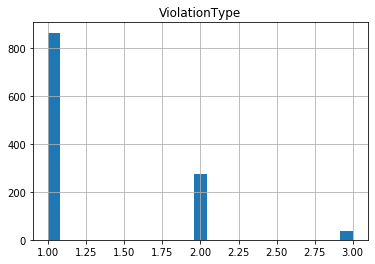

In [5]:
df.hist(column = 'ViolationType', bins = 25)
f1 = plt.gcf()

With this histogram, it is evident that there are a lot more CDI violation types than there are repeat violations, or violations that need further verification. Here, the X axis represents the ViolationType, while the Y axis represents the number of times it is is in the dataset. 

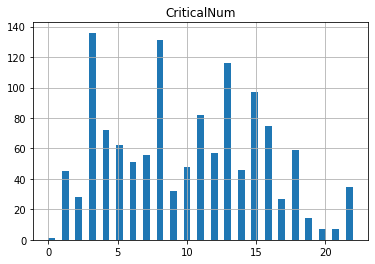

In [6]:
df.hist(column = 'CriticalNum', bins = 45)
f2 = plt.gcf()

With this histogram, it is evident that there is not really a set skew, even though the critical numbers tend to decrease after the 15th mark. Here, the X axis is the CriticalNum, while the Y axis is the amount of times the CriticalNum was within the dataset. 

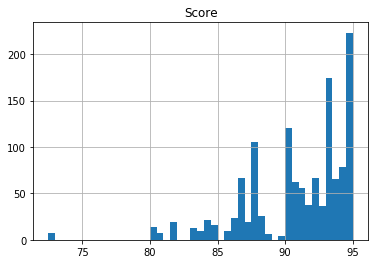

In [7]:
df.hist(column = 'Score', bins = 45)
f3 = plt.gcf()

With this histogram, it is evident that there appears to be a left skew, even though the critical numbers tend to decrease after the 15th mark. Here, the X axis is the score, while the Y axis is the amount of times that score was in the dataset. 

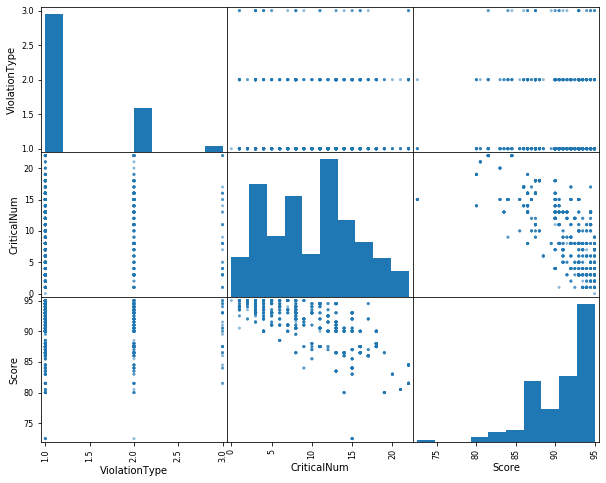

In [8]:
pd.plotting.scatter_matrix(df[['ViolationType', 'CriticalNum', 'Score']], figsize = (10, 8))
f4 = plt.gcf()

This scatterplot matrix allows for the graphs to be compared to each other. 

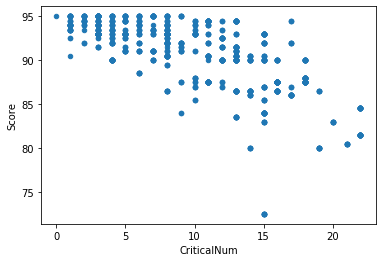

In [9]:
df.plot(kind = 'scatter', x = 'CriticalNum', y = 'Score')
f5 = plt.gcf()

Given the scatter plot above, there is somewhat of a decrease in score as the critical number goes over the 10th mark. 

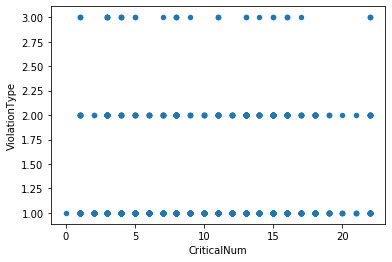

In [10]:
df.plot(kind = 'scatter', x = 'CriticalNum', y = 'ViolationType')
f6 = plt.gcf()

ViolationType variable does not cause an increase or decrease in the CriticalNum, or vice versa. Hence, there is not a positive nor a negative correlation between these two variables. 

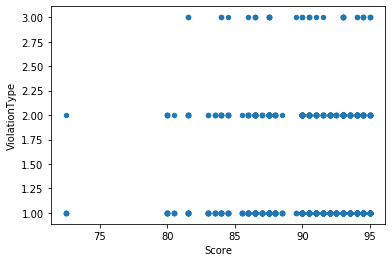

In [11]:
df.plot(kind = 'scatter', x = 'Score', y = 'ViolationType')
f7 = plt.gcf()

ViolationType variable does not cause an increase or decrease in the Score, or vice versa. Hence, there is not a positive nor a negative correlation between these two variables. 

With these visualizations, the hypothesis made can be proved there is not necessarily outliers that could cause an effect in the overall analysis. 

# Ethics & Privacy

In order to properly answer the proposed research question and to account for ethics and privacy concerns, the datasets used were analyzed for potential observations that could inflict harm upon both the restaurant facilities and the individuals in the 27511 postal code of Wake County. The names, along with the corresponding address and phone number  of the restaurants were hence considered potential sources of privacy violations, since both the critical number of violations and the score could lead to an erronous association between the name of a restaurant and its overall sanitation condition. Without context, the name of a given restaurant could evoke an immediate negative view by the public. Dropping these observations in the data cleaning process was therefore carried out, hence establishing the restaurant's identity through the HSISID and the zip code. 

As for any potential biases within the used datasets, there exists the possibility that the inspector who carried out the inspection could have had a bias towards the restaurant facility they were inspecting. However, given the Wake County health department's information about referring to the CDC guidelines, it is safe to assume that the inspectors conducted their inspection in accordance to the CDC guidelines and the Wake County health department.However, maintaining a regular inspection on this and conducting an analysis on who has performed these inspections will be an important asset to include as an addition to this project. 

# Conclusion & Discussion

This project investigates whether there is a negative relationship between the number of critical violations and the score given to restaurants in the 27511 postal code of Wake County, North Carolina. Additionally, it investigates whether such a relationship correlates with the violation type. After analyzing and reveiwing the data, it is seen that there is in fact a decrease in score as the critical number goes over the 10th mark, something seen in the scatter plot of the CriticalNum and the Score. Hence, the higher the critical number of violations is, the lower the score. As for whether there is a correlation with the previously mentioned relationship and the ViolationType, it was found that there was not a positive nor negative correlation, since the ViolationType variable does not cause an increase or decrease in both the Score and the CriticalNum. Hence, there is not a positive nor a negative correlation between these two variables. Overall, it can be said that the hypothesis made was correct. 

Having said this, some limitations to this project include the fact that the non critical number of violations were not compared to the score. It could be the case that the non critical number of violations greatly affect the score, especially when combined. This is something that a future analysis can consider as an update to this project. Similarly, another limitation is the fact that a lot of the restaurants are repeated within the dataset. It can hence also be the case that having multiple repetitions of a given facility could have had an effect with the trend of the visualized scatterplot. 

Overall, this project can hopefully have the scores given in an inspection serve a purpose of motivation for restaurant facilities in the 27511 postal code of Wake County, therefore decreasing the number of critical violations within a restaurant. Furthermore, this can help lead to bettering the health inspection process by making the process much faster and much more efficient. 